# Part 1 One
- (import) from vega_datasets import data
- data.sf_temps() <br>

Use the above dataset for the following exercises:

In [1]:
#imports: 
import pandas as pd
import numpy as np

# exercise:
from vega_datasets import data
import matplotlib.pyplot as plt

#Time imports: 
from datetime import datetime

#warnings: 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# call the data set: 
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### Question 1: 
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
# need to make the index the date: 
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [4]:
# resample the data frame: 
df_daily = df.resample('D').mean()
df_daily.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


### Question 2:
Write the code necessary to visualize the minimum temperature over time.

In [5]:
#table with mean, min, max
df.resample('D').agg(['mean','min','max']).head()

temp            
                 mean   min   max
date                             
2010-01-01  49.170833  45.8  53.3
2010-01-02  49.304167  46.0  53.4
2010-01-03  49.391667  46.1  53.5
2010-01-04  49.445833  46.1  53.6
2010-01-05  49.491667  46.1  53.8

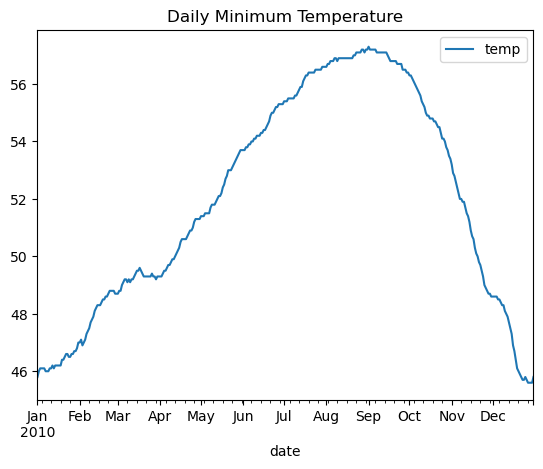

In [6]:
df.resample('D').min().plot(label = 'daily')
plt.title('Daily Minimum Temperature')
plt.show()

### Question 3: 
Write the code necessary to visualize the minimum temperature over time.

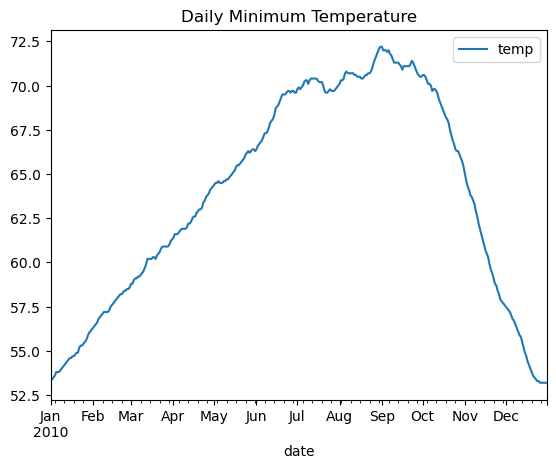

In [7]:
df.resample('D').max().plot(label = 'daily')
plt.title('Daily Minimum Temperature')
plt.show()

### Question 5:
Which month is the coldest, on average?

In [8]:
df.resample('M').mean()['temp'].idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

### Question 6:
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [9]:
# get the min temperature
df.resample('D').agg('min')['temp'].idxmax()

Timestamp('2010-09-01 00:00:00', freq='D')

In [10]:
# get the max temperature
df.resample('D').agg('max')['temp'].idxmax()

Timestamp('2010-08-31 00:00:00', freq='D')

In [11]:
# make it into a dataframe
minmax = df.resample('D').agg(['min', 'max'])
minmax.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [12]:
# min and max
minmax.max() - minmax.min()

temp  min    11.7
      max    19.0
dtype: float64

In [13]:
# get the month with the highest daily temperature variability: 
minmax['temp_variance'] = minmax.temp['max'] - minmax.temp['min']
minmax.head()

temp       temp_variance
             min   max              
date                                
2010-01-01  45.8  53.3           7.5
2010-01-02  46.0  53.4           7.4
2010-01-03  46.1  53.5           7.4
2010-01-04  46.1  53.6           7.5
2010-01-05  46.1  53.8           7.7

### Question 7: Bonus
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

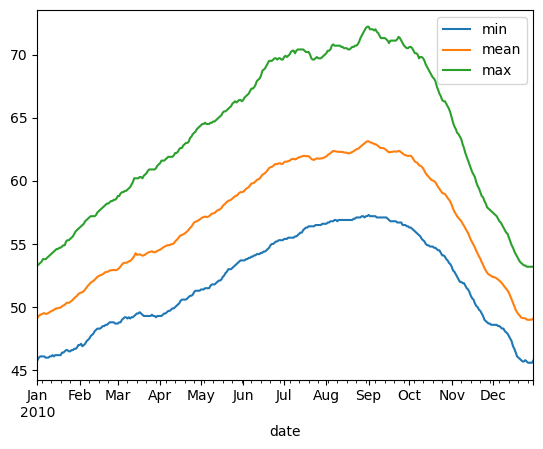

In [14]:
df.resample('D').agg(['min','mean','max']).temp.plot();

# Part 2:

In [15]:
# dataframe: 
df2 = data.seattle_weather()
df2.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [16]:
# set the index as the data
df2 = df2.set_index('date').sort_index()
df2.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### Question 1:
Which year and month combination has the highest amount of precipitation?

In [21]:
# month with highest amount of precipitation
df2.resample('M').sum().precipitation.max()

284.5

In [20]:
# year with highest amount of precipitation
df2.resample('Y').sum().precipitation.max()

1232.8

### Question 2: 
Visualize the amount of monthly precipitation over time.

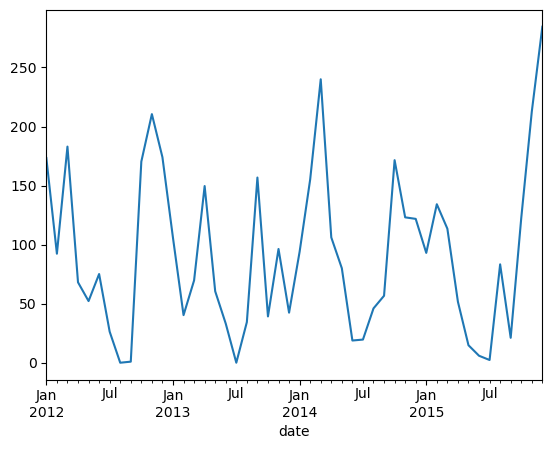

In [22]:
df2.resample('M').sum().precipitation.plot();

### Question 3: 
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

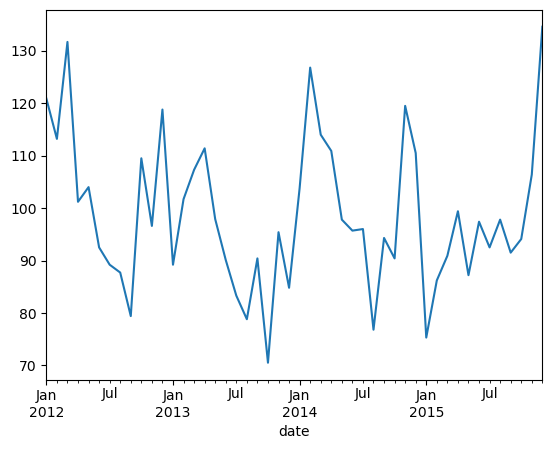

In [23]:
df2.resample('M').sum().wind.plot();

### Question 4:
Which year-month combination is the windiest?

In [24]:
df2.resample('M').sum().wind.sort_values(ascending=False).head(1)

date
2015-12-31    134.6
Name: wind, dtype: float64

### Question 5: 
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [26]:
df2[df2.weather == 'sun'].index.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: date, dtype: int64

### Question 6: 
In which month does it rain the most?

In [28]:
df2.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [29]:
df2.groupby(df2.index.month_name()).sum().precipitation.idxmax()

'November'

In [30]:
df2.groupby(df2.index.month_name()).sum().precipitation.max()

642.5

### Question 7:
Which month has the most number of days with a non-zero amount of precipitation?

In [31]:
df2['month'] = df2.index.month_name()
df2.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January
2012-01-02,10.9,10.6,2.8,4.5,rain,January
2012-01-03,0.8,11.7,7.2,2.3,rain,January
2012-01-04,20.3,12.2,5.6,4.7,rain,January
2012-01-05,1.3,8.9,2.8,6.1,rain,January


In [32]:
df2[df2.precipitation > 0].groupby('month').count().weather.sort_values().tail(1)

month
December    81
Name: weather, dtype: int64

# Part 3:

In [38]:
# get data:
df3 = data.flights_20k()

In [39]:
# reset the index: 
df3 = df3.set_index('date').sort_index()
df3.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Question 1:
Convert any negative delays to 0.

In [41]:
df3.delay = np.where(df3.delay < 0, 0, df3.delay)

### Question 2:
Which hour of the day has the highest average delay?

In [42]:
df3['hour'] = df3.index.hour

In [43]:
df3.groupby('hour').mean().delay.sort_values().tail(1)

hour
3    302.5
Name: delay, dtype: float64

### Question 3: 
Does the day of the week make a difference in the delay amount?

In [44]:
df3['weekday'] = df3.index.day_name()

In [45]:
df3.groupby('weekday').mean().delay.sort_values()

weekday
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

### Question 4:
Does the month make a difference in the delay amount?

In [46]:
df3['month'] = df3.index.month_name()

In [47]:
df3.groupby('month').mean().delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

# Bonus 